Задание 1. Базовое изучение

Изучить представленный набор данных на основе описания его столбцов и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [20]:
# Ознакомимся с таблцией
url="https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv"

data = pd.read_csv(url,
                names=['1.surgery', '2.age', '3.Hospital Number', '4.rectal temperature', '5.pulse', '6.respiratory rate', 
                       '7.temperature of extremities', '8.peripheral pulse', '9.mucous membranes', 
                       '10.capillary refill time', '11.pain', '12.peristalsis', '13.abdominal distension', 
                       '14.nasogastric tube', '15.nasogastric reflux', '16.nasogastric reflux PH', '17.rectal examination',
                       '18.abdomen', '19.packed cell volume', '20.total protein', '21.abdominocentesis appearance',
                       '22.abdomcentesis total protein', '23.outcome', '24.surgical lesion?', '25.type of lesion-1',
                       '26.type of lesion-2', '27.type of lesion-3', '28.cp_data'])
df.head()

,1.surgery,2.Age,3.Hospital Number,4.rectal temperature,5.pulse,6.respiratory rate,7.temperature of extremities,8.peripheral pulse,9.mucous membranes,10.capillary refill time,...,19.packed cell volume,20.total protein,21.abdominocentesis appearance,22.abdomcentesis total protein,23.outcome,24.surgical lesion?,25.type of lesion-1,26.type of lesion-2,27.type of lesion-3,28.cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [23]:
# 8 столбцов для дальнейшего изучения: "операция", "возраст", "ректальная температура", "пульс", "частота дыхания", 
# "температура конечностей", "уровень боли", "результат"

values = ['1.surgery', '2.age', '4.rectal temperature', '5.pulse', '6.respiratory rate', '7.temperature of extremities',
           '11.pain', '23.outcome']

data = data[values].replace({'?': np.nan})

data['2.age'] = data['2.age'].replace({9: 2})

data.head()

,1.surgery,2.age,4.rectal temperature,5.pulse,6.respiratory rate,7.temperature of extremities,11.pain,23.outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,NaN,3,3
2,2,1,38.30,40,24,1,3,1
3,1,2,39.10,164,84,4,2,2
4,2,1,37.30,104,35,NaN,NaN,2


In [25]:
for x in data.columns:
    data[x] = pd.to_numeric(data[x])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   1.surgery                     299 non-null    float64
 1   2.age                         300 non-null    int64  
 2   4.rectal temperature          240 non-null    float64
 3   5.pulse                       276 non-null    float64
 4   6.respiratory rate            242 non-null    float64
 5   7.temperature of extremities  244 non-null    float64
 6   11.pain                       245 non-null    float64
 7   23.outcome                    299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [26]:
#  расчет базовых метрик
out = pd.DataFrame({'Параметр': values})

out.insert(1, "Среднее", data.apply(lambda x: round(x.mean(), 3)).values)
out.insert(2, "Медиана", data.apply(lambda x: round(x.median(), 3)).values)
out.insert(3, "Мода", data.apply(lambda x: round(x.mode()[0], 3)).values)
out.insert(4, "Минимум", data.apply(lambda x: round(min(x), 3)).values)
out.insert(5, "Максимум", data.apply(lambda x: round(max(x), 3)).values)
out.insert(6, "Сред.отклонение", data.apply(lambda x: round(x.std(), 3)).values)
out.insert(7, "Размах", data.apply(lambda x: round(max(x)-min(x), 3)).values)

out

,Параметр,Среднее,Медиана,Мода,Минимум,Максимум,Сред.отклонение,Размах
0,1.surgery,1.398,1.0,1.0,1.0,2.0,0.490,1.0
1,2.age,1.080,1.0,1.0,1.0,2.0,0.272,1.0
2,4.rectal temperature,38.168,38.2,38.0,35.4,40.8,0.732,5.4
3,5.pulse,71.913,64.0,48.0,30.0,184.0,28.631,154.0
4,6.respiratory rate,30.417,24.5,20.0,8.0,96.0,17.642,88.0
5,7.temperature of extremities,2.348,3.0,3.0,1.0,4.0,1.045,3.0
6,11.pain,2.951,3.0,3.0,1.0,5.0,1.308,4.0
7,23.outcome,1.552,1.0,1.0,1.0,3.0,0.737,2.0


Краткое описание результатов

"операция" - не всем лошадям сделали операции.
"ректальная температура" - Большинство лошадей имеет нормальную температуру ( Согласно гуглу температура может быть от 37,5 до 38,5)
"пульс" -  Согласно гуглу пульс в состоянии покоя от 25 до 40 ударов в минуту, у большинства лошадей превышает нормы.
"частота дыхания" - Согласно гуглу в состоянии покоя от 12 до 24 вдохов в минуту, так же у большинства лошадей наблюдается превышение нормы.
"уровень боли" чащи всего = 3, т.е. периодическая, легкая боль
"результат" - Результат большенства обследуемх лошадей = 1, т.е. они живы.

Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

In [37]:
def quart(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr) 
    higher = q3 + (1.5 * iqr)
    outliers = data[~x.between(lower, higher)]
    return len(outliers)

out2 = pd.DataFrame({'Параметр': values})
out2.insert(1, "Выбросы", data.apply(quart).values)
out2

,Параметр,Выбросы
0,1.surgery,1
1,2.age,24
2,4.rectal temperature,74
3,5.pulse,29
4,6.respiratory rate,75
5,7.temperature of extremities,56
6,11.pain,55
7,23.outcome,1


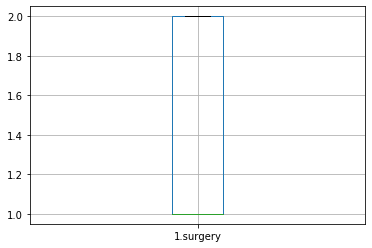

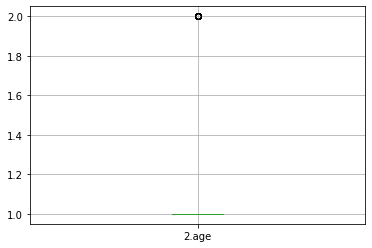

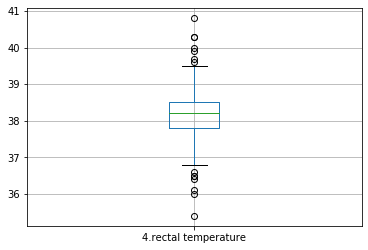

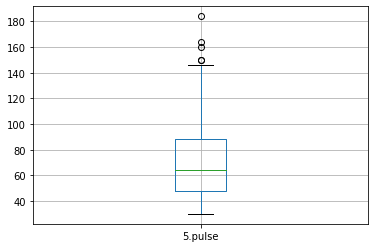

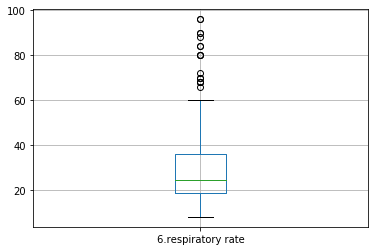

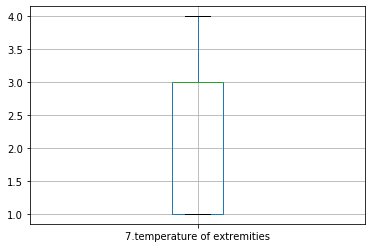

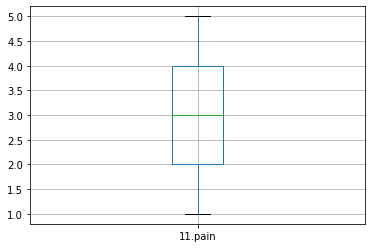

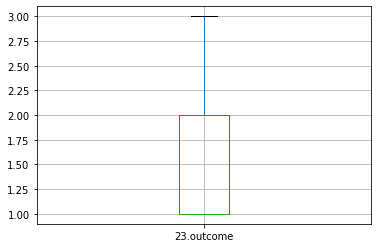

In [38]:
for x in data.columns:
    data[x].plot(kind='box')
    plt.grid()
    plt.show()

In [41]:
#В большинстве случаем выбросы это некорректно введенная информация как по значениям, так и ввели не туда,
#либо некорректно считываеться информация для расчетов.
#Например, хотели ввести 10, а проставили 19. Второй пример, рассчитывают среднию, а отсутствие значений указывают как 0,
#а при расчете средней 0 учитывается в расчетах как значение.

#Пропуска можно заменить средними значениями, как один из вариантов, либо удалить, если кол-во выборки позволяет.

Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [35]:

def empty(x):
    res = x.isnull().sum()
    return res

out3 = pd.DataFrame({'Параметр': values})
out3.insert(1, "Пропуски", data.apply(empty).values)
out3

,Параметр,Пропуски
0,1.surgery,1
1,2.age,0
2,4.rectal temperature,60
3,5.pulse,24
4,6.respiratory rate,58
5,7.temperature of extremities,56
6,11.pain,55
7,23.outcome,1


In [42]:
# Процентное отображение пропусков
for x in data.columns:
    missing = data[x].isnull().mean()
    print(f'{x}: {missing :.1%}')
print('Кол-во строк:',len(data))

1.surgery: 0.3%
2.age: 0.0%
4.rectal temperature: 20.0%
5.pulse: 8.0%
6.respiratory rate: 19.3%
7.temperature of extremities: 18.7%
11.pain: 18.3%
23.outcome: 0.3%
Кол-во строк: 300


In [44]:
# Удалим пустые строки, т.к. их кол-во мало.
data3 = data.dropna(subset=['1.surgery','23.outcome'])
print('Кол-во строк:',len(data3))

# выведим основные параметры для каждого поля
def params(x, title=''):
    print(x.name,title)
    print('Среднее:',round(x.mean(),2))
    print('Медиана:',round(x.median(),2))
    print('Мода:',x.mode()[0])
    print('Сред.отклонение',round(x.std(),2),"\n")
    
# Заменяем модой, т.к. почти равны.
vmode = data['4.rectal temperature'].mode()[0]
data3['4.rectal temperature'].fillna(vmode, inplace=True)

# Так же заменяем модой.
vmedian = data['5.pulse'].median()
data3['5.pulse'].fillna(vmedian, inplace=True)

# тоже модой

vmedian = data['6.respiratory rate'].median()
data3['6.respiratory rate'].fillna(vmedian, inplace=True)

# тоже модой

vmode = data['7.temperature of extremities'].mode()[0]
data3['7.temperature of extremities'].fillna(vmode, inplace=True)

vmode = data['11.pain'].mode()[0]
data3['11.pain'].fillna(vmode, inplace=True)

data3

Кол-во строк: 299


,1.surgery,2.age,4.rectal temperature,5.pulse,6.respiratory rate,7.temperature of extremities,11.pain,23.outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,3.0,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,38.0,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [45]:
# Расчет базовых метрик для нового датафрейма

out4 = pd.DataFrame({'Параметр': values})

out4.insert(1, "Среднее", data3.apply(lambda x: round(x.mean(), 3)).values)
out4.insert(2, "Медиана", data3.apply(lambda x: round(x.median(), 3)).values)
out4.insert(3, "Мода", data3.apply(lambda x: round(x.mode()[0], 3)).values)
out4.insert(4, "Минимум", data3.apply(lambda x: round(min(x), 3)).values)
out4.insert(5, "Максимум", data3.apply(lambda x: round(max(x), 3)).values)
out4.insert(6, "Сред.отклонение", data3.apply(lambda x: round(x.std(), 3)).values)
out4.insert(7, "Размах", data3.apply(lambda x: round(max(x)-min(x), 3)).values)

out4

,Параметр,Среднее,Медиана,Мода,Минимум,Максимум,Сред.отклонение,Размах
0,1.surgery,1.398,1.0,1.0,1.0,2.0,0.490,1.0
1,2.age,1.080,1.0,1.0,1.0,2.0,0.272,1.0
2,4.rectal temperature,38.135,38.0,38.0,35.4,40.8,0.659,5.4
3,5.pulse,71.358,64.0,64.0,30.0,184.0,27.555,154.0
4,6.respiratory rate,29.304,24.5,24.5,8.0,96.0,16.029,88.0
5,7.temperature of extremities,2.468,3.0,3.0,1.0,4.0,0.977,3.0
6,11.pain,2.957,3.0,3.0,1.0,5.0,1.182,4.0
7,23.outcome,1.552,1.0,1.0,1.0,3.0,0.737,2.0


In [46]:
#Расчет базовых метрик для исходного датафрейма для сравнения

out = pd.DataFrame({'Параметр': values})

out.insert(1, "Среднее", data.apply(lambda x: round(x.mean(), 3)).values)
out.insert(2, "Медиана", data.apply(lambda x: round(x.median(), 3)).values)
out.insert(3, "Мода", data.apply(lambda x: round(x.mode()[0], 3)).values)
out.insert(4, "Минимум", data.apply(lambda x: round(min(x), 3)).values)
out.insert(5, "Максимум", data.apply(lambda x: round(max(x), 3)).values)
out.insert(6, "Сред.отклонение", data.apply(lambda x: round(x.std(), 3)).values)
out.insert(7, "Размах", data.apply(lambda x: round(max(x)-min(x), 3)).values)

out

,Параметр,Среднее,Медиана,Мода,Минимум,Максимум,Сред.отклонение,Размах
0,1.surgery,1.398,1.0,1.0,1.0,2.0,0.490,1.0
1,2.age,1.080,1.0,1.0,1.0,2.0,0.272,1.0
2,4.rectal temperature,38.168,38.2,38.0,35.4,40.8,0.732,5.4
3,5.pulse,71.913,64.0,48.0,30.0,184.0,28.631,154.0
4,6.respiratory rate,30.417,24.5,20.0,8.0,96.0,17.642,88.0
5,7.temperature of extremities,2.348,3.0,3.0,1.0,4.0,1.045,3.0
6,11.pain,2.951,3.0,3.0,1.0,5.0,1.308,4.0
7,23.outcome,1.552,1.0,1.0,1.0,3.0,0.737,2.0
